In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np


import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [5]:
df = pd.read_csv('Downloads/Recommendation_Models/ml_models/car/original_dataset_kaggle.csv')

Desplay dataset

In [6]:
df

Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       CNG       Manual      First  26.6 km/kg   
1                 41000    Diesel       Manual      First  19.67 kmpl   
2                 46000    Petrol       Manual      First   18.2 kmpl   
3                 87000    Diesel       Manual      First  20.77 kmpl   
4                 40670    Diesel    Automatic     Second   15.2 kmpl   
...                 ...       ...          ...        ...         ...   
6014              27365    Diesel       Manual      First   28.4 kmpl   
6015             100000    Diesel       Manual      First   24.4 kmpl   
6016              55000    Diesel       Manual     Second   14.0 kmpl   
6017              46000    Petrol       Manual      First   18.9 kmpl   
6018              47000    Diesel       Manual      First  25.44 kmpl   

       Engine      Power  Seats  New_Price  Price  
0      998 CC  58.16 bhp    5.0        NaN   1.75  
1     1582 CC  126.2 bhp    5.0        NaN  12.50  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50  
3     1248 CC  88.76 bhp    7.0        NaN   6.00  
4     1968 CC  140.8 bhp    5.0        NaN  17.74  
...       ...        ...    ...        ...    ...  
6014  1248 CC     74 bhp    5.0  7.88 Lakh   4.75  
6015  1120 CC     71 bhp    5.0        NaN   4.00  
6016  2498 CC    112 bhp    8.0        NaN   2.90  
6017   998 CC   67.1 bhp    5.0        NaN   2.65  
6018   936 CC   57.6 bhp    5.0        NaN   2.50  

[6019 rows x 14 columns]

Prepare Report Profile for the dataset and Desplay it

In [8]:
import pandas as pd
from pandas_profiling import ProfileReport


profile = ProfileReport(df, title='Car Pandas Profiling Report Version 1', explorative=True)

profile.to_file("Downloads/car/car_cleaning_dataset_version1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_notebook_iframe()

# Now let's deal with the Aterts presenting in the report

remove the personal features(Name, Location) and id('Unnamed: 0) and highly overall correlated features (Kilometers_Driven) and the features that I dont need to recommand an insurance(Owner_Type, Engine) and the feature with highly missing values (New_Price)

In [10]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Owner_Type',axis=1)
df = df.drop('New_Price',axis=1)
df = df.drop('Engine',axis=1)
df = df.drop('Location',axis=1)
df = df.drop('Kilometers_Driven',axis=1)

In [11]:
df

Year Fuel_Type Transmission     Mileage      Power  Seats  Price
0     2010       CNG       Manual  26.6 km/kg  58.16 bhp    5.0   1.75
1     2015    Diesel       Manual  19.67 kmpl  126.2 bhp    5.0  12.50
2     2011    Petrol       Manual   18.2 kmpl   88.7 bhp    5.0   4.50
3     2012    Diesel       Manual  20.77 kmpl  88.76 bhp    7.0   6.00
4     2013    Diesel    Automatic   15.2 kmpl  140.8 bhp    5.0  17.74
...    ...       ...          ...         ...        ...    ...    ...
6014  2014    Diesel       Manual   28.4 kmpl     74 bhp    5.0   4.75
6015  2015    Diesel       Manual   24.4 kmpl     71 bhp    5.0   4.00
6016  2012    Diesel       Manual   14.0 kmpl    112 bhp    8.0   2.90
6017  2013    Petrol       Manual   18.9 kmpl   67.1 bhp    5.0   2.65
6018  2011    Diesel       Manual  25.44 kmpl   57.6 bhp    5.0   2.50

[6019 rows x 7 columns]

droping missing values and duplicates rows

In [12]:
df = df.drop_duplicates()
df = df.dropna()

Deal with imbalanced data for Fuel_Type feature by removing the 3 uniques values (CNG, LPG, Electric) which represent low records

In [13]:
df = df[df['Fuel_Type'] != 'CNG']
df = df[df['Fuel_Type'] != 'LPG']
df = df[df['Fuel_Type'] != 'Electric']

Keep only the rows where 'Mileage' contains the specified pattern kmpl cuz it's represent 74% of records

In [14]:
pattern_to_match = 'kmpl'

df = df[df['Mileage'].str.contains(pattern_to_match, case=False, na=False)]

remove the unity kmpl and bhp for both features Mileage and Power and keep only the numbers

In [15]:
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '')
df['Power'] = df['Power'].str.replace(' bhp', '')

Convert 'Mileage and Power' column to float, replacing non-convertible values with NaN

In [16]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

Remove the null values for both features Mileage and Power

In [17]:
df = df[df['Mileage'] != 0.0]
df = df[df['Power'] != 0.0]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5632 entries, 1 to 6018
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          5632 non-null   int64  
 1   Fuel_Type     5632 non-null   object 
 2   Transmission  5632 non-null   object 
 3   Mileage       5632 non-null   float64
 4   Power         5563 non-null   float64
 5   Seats         5632 non-null   float64
 6   Price         5632 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 352.0+ KB


In [19]:
df

Year Fuel_Type Transmission  Mileage   Power  Seats  Price
1     2015    Diesel       Manual    19.67  126.20    5.0  12.50
2     2011    Petrol       Manual    18.20   88.70    5.0   4.50
3     2012    Diesel       Manual    20.77   88.76    7.0   6.00
4     2013    Diesel    Automatic    15.20  140.80    5.0  17.74
6     2013    Diesel       Manual    23.08   63.10    5.0   3.50
...    ...       ...          ...      ...     ...    ...    ...
6013  2015    Diesel       Manual    25.80   98.60    5.0   4.83
6014  2014    Diesel       Manual    28.40   74.00    5.0   4.75
6016  2012    Diesel       Manual    14.00  112.00    8.0   2.90
6017  2013    Petrol       Manual    18.90   67.10    5.0   2.65
6018  2011    Diesel       Manual    25.44   57.60    5.0   2.50

[5632 rows x 7 columns]

Re-generate the version 2 of profile report after the first step of data cleaning

In [20]:
import pandas as pd
from pandas_profiling import ProfileReport


profile = ProfileReport(df, title='Car Pandas Profiling Report Version 2', explorative=True)

profile.to_file("Downloads/car/car_cleaning_dataset_version2.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
profile.to_notebook_iframe()

Drop the highly overall correlated features (Power , Price) 

In [22]:
df=df.drop('Power',axis=1)
df=df.drop('Price',axis=1)
df = df.drop_duplicates()
df = df.dropna()

In [23]:
df

Year Fuel_Type Transmission  Mileage  Seats
1     2015    Diesel       Manual    19.67    5.0
2     2011    Petrol       Manual    18.20    5.0
3     2012    Diesel       Manual    20.77    7.0
4     2013    Diesel    Automatic    15.20    5.0
6     2013    Diesel       Manual    23.08    5.0
...    ...       ...          ...      ...    ...
5990  2008    Diesel       Manual    13.93    7.0
5993  2014    Petrol       Manual    16.30    5.0
5998  2010    Petrol       Manual    17.24    5.0
6002  2011    Petrol       Manual    16.09    5.0
6016  2012    Diesel       Manual    14.00    8.0

[2284 rows x 5 columns]

Change the year feature from date format to age format

In [24]:
df['Year'] = 2023 - df['Year']

In [25]:
df.rename(columns={'Year': 'Age'}, inplace=True)

Encoding both Fuel_Type and Transmission features

In [27]:
mapping1 = {'Diesel': 0, 'Petrol': 1}
df['Fuel_Type'] = df['Fuel_Type'].map(mapping1)

In [28]:
mapping2 = {'Manual': 0, 'Automatic': 1}
df['Transmission'] = df['Transmission'].map(mapping2)

In [29]:
df

Age  Fuel_Type  Transmission  Mileage  Seats
1       8          0             0    19.67    5.0
2      12          1             0    18.20    5.0
3      11          0             0    20.77    7.0
4      10          0             1    15.20    5.0
6      10          0             0    23.08    5.0
...   ...        ...           ...      ...    ...
5990   15          0             0    13.93    7.0
5993    9          1             0    16.30    5.0
5998   13          1             0    17.24    5.0
6002   12          1             0    16.09    5.0
6016   11          0             0    14.00    8.0

[2284 rows x 5 columns]

Re-generate the version 3 of profile report after the second step of data cleaning

In [30]:
import pandas as pd
from pandas_profiling import ProfileReport


profile = ProfileReport(df, title='Car Pandas Profiling Report Version 3', explorative=True)

profile.to_file("Downloads/car/car_cleaning_dataset_version3.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
profile.to_notebook_iframe()

# Now we finished with data cleaning , let's deal with data preprocessing 

Plot the outliers using IQR method

All the values of Seats features are outliers except value 5 so if we remove all the outliers , the unique value stays will be 5 so that make this feature constant , we should then just drop it

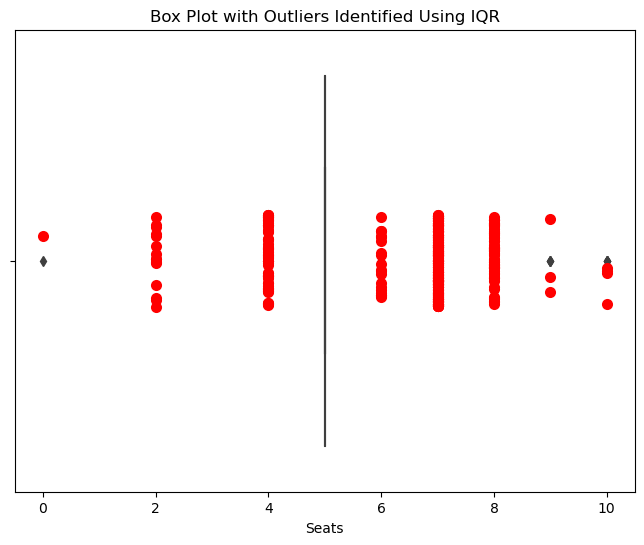

In [388]:
import matplotlib.pyplot as plt


# Calculate the IQR
Value = 'Seats'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

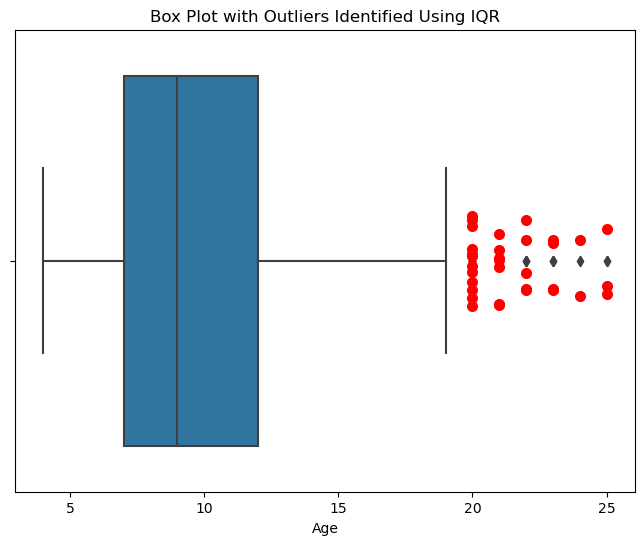

In [389]:
import matplotlib.pyplot as plt



# Calculate the IQR
Value = 'Age'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

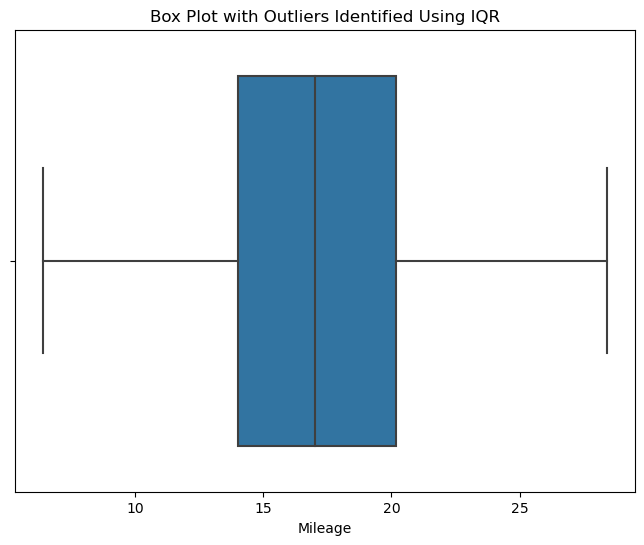

In [390]:
import matplotlib.pyplot as plt



# Calculate the IQR
Value = 'Mileage'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

In [391]:
df = df.drop('Seats',axis=1)

In [392]:
df = df.drop_duplicates()

Identify outliers of Age and drop them

In [393]:
import pandas as pd


# Calculate the IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


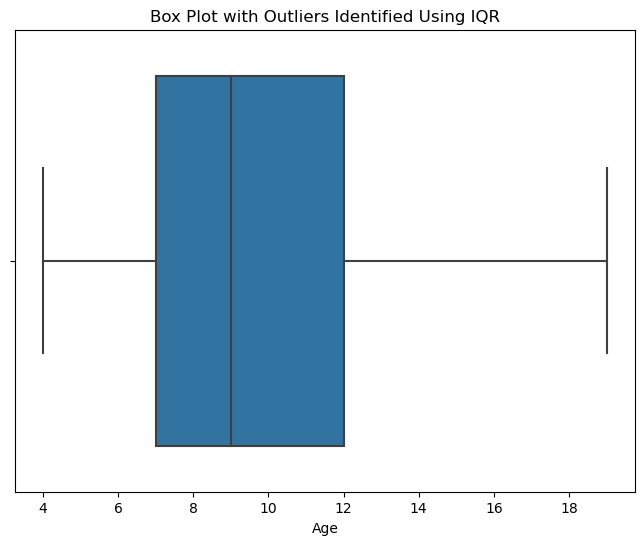

In [394]:
import matplotlib.pyplot as plt



# Calculate the IQR
Value = 'Age'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

In [395]:
df

Age  Fuel_Type  Transmission  Mileage
1       8          0             0    19.67
2      12          1             0    18.20
3      11          0             0    20.77
4      10          0             1    15.20
6      10          0             0    23.08
...   ...        ...           ...      ...
5990   15          0             0    13.93
5993    9          1             0    16.30
5998   13          1             0    17.24
6002   12          1             0    16.09
6016   11          0             0    14.00

[2182 rows x 4 columns]

In [396]:
df.to_csv('Downloads/car/car_dataset_dataset_cleaning_preprocessing.csv' , index=False)

# Unsupervised learning : t-SNE

Used here tsne for dimentionality reduction without scaling data

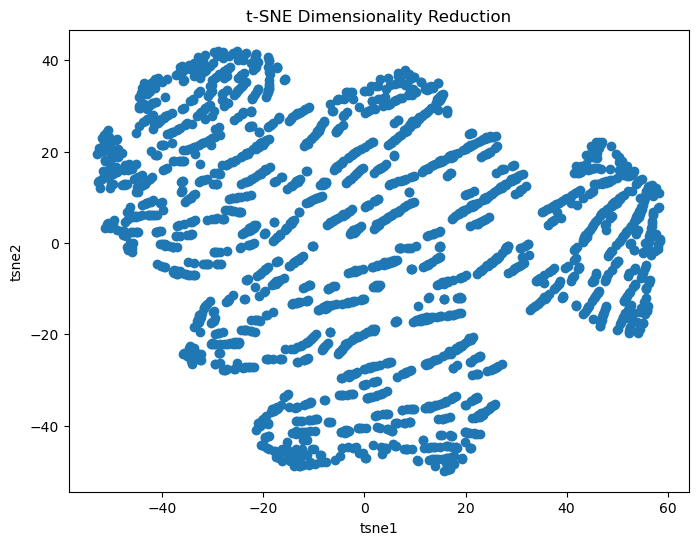

In [397]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Instantiate the t-SNE model with the desired number of dimensions (e.g., 2)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit and transform the data using t-SNE
tsne_result = tsne.fit_transform(df)

# Create a new DataFrame with the reduced dimensions
df_tsne = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])



# Plot the reduced-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'])
plt.title('t-SNE Dimensionality Reduction')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()


In [398]:
df_tsne

tsne1      tsne2
0     24.372446  -5.155794
1     -8.993846  25.009237
2      9.102859  25.368746
3    -19.163689  -5.364357
4     24.014757  23.123119
...         ...        ...
2177 -38.123817  21.907921
2178  -1.059946  -5.904062
2179 -14.935296  26.700899
2180 -19.733625  16.104399
2181 -28.361019  -4.510264

[2182 rows x 2 columns]

Used here tsne for dimentionality reduction with data scaling

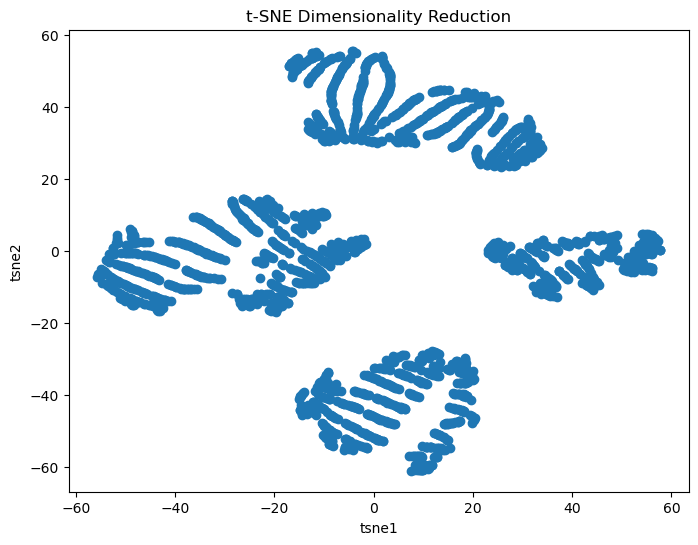

In [399]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Instantiate the t-SNE model with the desired number of dimensions (e.g., 2)
tsne1 = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit and transform the data using t-SNE
tsne_result1 = tsne1.fit_transform(scaled_data)

# Create a new DataFrame with the reduced dimensions
df_tsne1 = pd.DataFrame(tsne_result1, columns=['tsne1', 'tsne2'])



# Plot the reduced-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne1['tsne1'], df_tsne1['tsne2'])
plt.title('t-SNE Dimensionality Reduction')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()


In [400]:
df_tsne1

tsne1      tsne2
0    -34.253288  -7.353068
1     12.308592  32.557228
2    -25.908514   8.179646
3      7.149873 -39.658810
4    -35.073444   8.984624
...         ...        ...
2177  -6.240814   1.747796
2178   3.358423  47.929241
2179  18.074741  31.021818
2180  16.486761  36.362846
2181 -12.861014  -3.661882

[2182 rows x 2 columns]

Used here tsne for dimentionality reduction with data scaling and perplexity=90

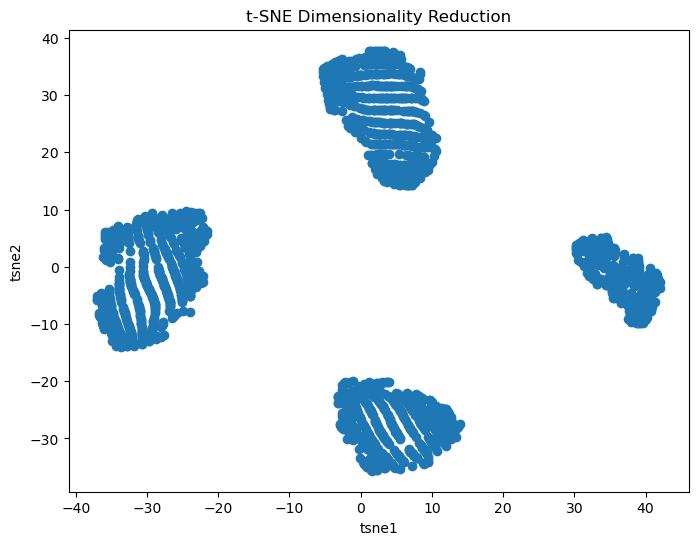

In [401]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(df)

# Instantiate the t-SNE model with the desired number of dimensions (e.g., 2)
tsne2 = TSNE(n_components=2, perplexity=90, random_state=42)

# Fit and transform the data using t-SNE
tsne_result2 = tsne2.fit_transform(scaled_data1)

# Create a new DataFrame with the reduced dimensions
df_tsne2 = pd.DataFrame(tsne_result2, columns=['tsne1', 'tsne2'])



# Plot the reduced-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne2['tsne1'], df_tsne2['tsne2'])
plt.title('t-SNE Dimensionality Reduction')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()


In [402]:
df_tsne2

tsne1      tsne2
0    -32.417332  -2.159806
1      2.211588  23.241976
2    -25.859108  -2.096014
3      6.667591 -27.645891
4    -26.742596  -6.338979
...         ...        ...
2177 -24.273785   7.796214
2178   5.398940  29.535688
2179   3.607690  21.404640
2180   5.473026  23.061468
2181 -28.676273   7.010161

[2182 rows x 2 columns]

# Unsupervised learning : EM 

Comparing with (Davies-Bouldin Index vs. Number of Clusters diagram , Silhouette Score vs. Number of Clusters diagram and Elbow) to detect best k for cluster's number using the dataset df_tsne generated by tsne model without data scaling cuz we want the number of clusters to be big to keeping the car insurance recommended to the client closer to what he or she want

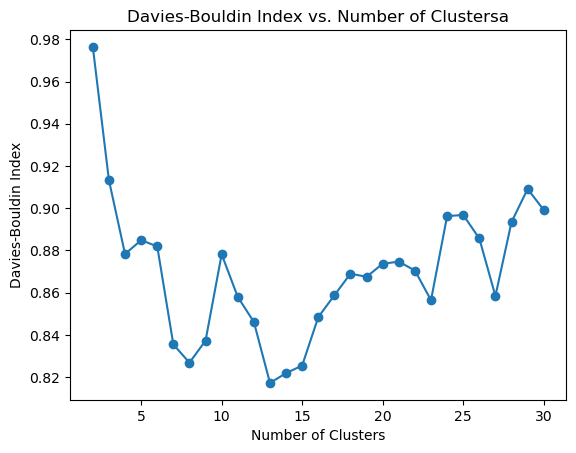

Optimal Number of Clusters: 13


In [428]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score


# Range of cluster numbers to try
num_clusters_range = range(2, 31)

# List to store Davies-Bouldin Index scores
davies_bouldin_scores = []

for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(df_tsne)
    davies_bouldin_scores.append(davies_bouldin_score(df_tsne, cluster_labels))

# Plotting the Davies-Bouldin Index scores
plt.plot(num_clusters_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clustersa')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Find the optimal number of clusters with the lowest Davies-Bouldin Index
optimal_num_clusters = num_clusters_range[np.argmin(davies_bouldin_scores)]
print("Optimal Number of Clusters:", optimal_num_clusters)


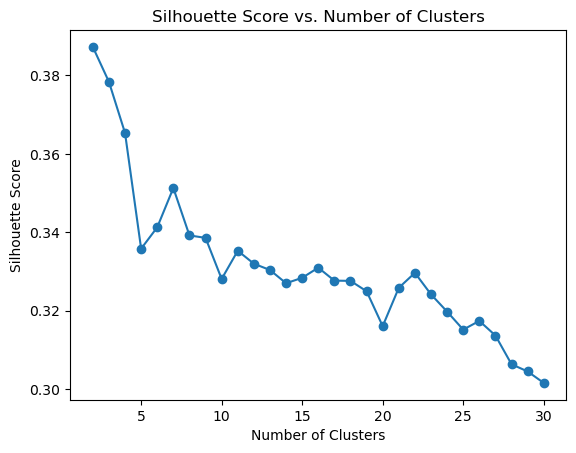

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Range of cluster numbers to try
num_clusters_range = range(2, 31)

# List to store silhouette scores
silhouette_scores = []

for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(df_tsne)
    silhouette_scores.append(silhouette_score(df_tsne, cluster_labels))

# Plotting the Elbow Curve
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


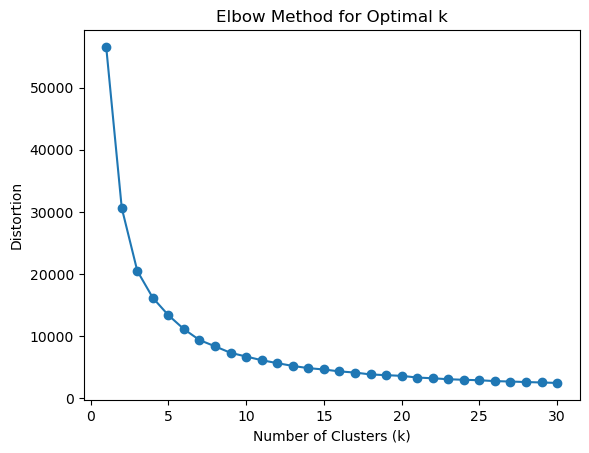

In [431]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


distortions = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_tsne)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 31), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()


Using EM to train the model on the scaled dataset df_tsne to get the cluster output , I choose num_clutsers=19 after analysing the interval of each cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster 0 Intervals:
tsne1: Min = 28.470731735229492, Max = 56.10051345825195
tsne2: Min = -19.810163497924805, Max = -3.2145376205444336
---------------------
Cluster 1 Intervals:
tsne1: Min = -52.925262451171875, Max = -42.98865509033203
tsne2: Min = 11.089563369750977, Max = 24.65151596069336
---------------------
Cluster 2 Intervals:
tsne1: Min = -7.945828914642334, Max = 16.225982666015625
tsne2: Min = -47.6627311706543, Max = -26.007064819335938
---------------------
Cluster 3 Intervals:
tsne1: Min = -11.324884414672852, Max = 9.352080345153809
tsne2: Min = -14.78299617767334, Max = -3.7764334678649902
---------------------
Cluster 4 Intervals:
tsne1: Min = 13.523963928222656, Max = 38.90187454223633
tsne2: Min = -6.744479656219482, Max = 24.13201332092285
---------------------
Cluster 5 Intervals:
tsne1: Min = -17.16492462158203, Max = 13.10532283782959
tsne2: Min = 7.082734107971191, Max = 31.452632904052734
---------------------
Cluster 6 Intervals:
tsne1: Min = -27.7556819915

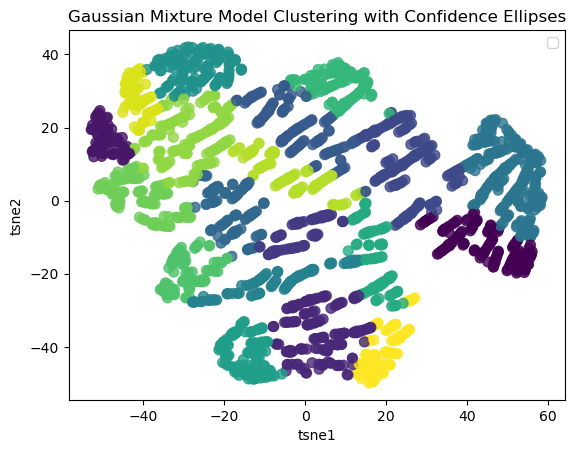

In [407]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

scaler = StandardScaler()
X = scaler.fit_transform(df_tsne)


# Choose the number of clusters (you may need to tune this)
num_clusters = 19

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Add cluster labels to the DataFrame
df_tsne['Cluster'] = labels

# Print intervals for each cluster
for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    cluster_data = df_tsne.iloc[cluster_indices]

    feature1_interval = (cluster_data['tsne1'].min(), cluster_data['tsne1'].max())
    feature2_interval = (cluster_data['tsne2'].min(), cluster_data['tsne2'].max())

    print(f"Cluster {i} Intervals:")
    print(f"tsne1: Min = {feature1_interval[0]}, Max = {feature1_interval[1]}")
    print(f"tsne2: Min = {feature2_interval[0]}, Max = {feature2_interval[1]}")
    print("---------------------")

# Plot the clusters with confidence ellipses
plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=labels, cmap='viridis', s=50, alpha=0.8)



plt.title('Gaussian Mixture Model Clustering with Confidence Ellipses')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend()
plt.show()


In [408]:
df_tsne

tsne1      tsne2  Cluster
0     24.372446  -5.155794        4
1     -8.993846  25.009237        5
2      9.102859  25.368746       12
3    -19.163689  -5.364357        6
4     24.014757  23.123119        4
...         ...        ...      ...
2177 -38.123817  21.907921       17
2178  -1.059946  -5.904062        3
2179 -14.935296  26.700899        5
2180 -19.733625  16.104399       15
2181 -28.361019  -4.510264       14

[2182 rows x 3 columns]

In [409]:
df.to_csv('Downloads/car_model_dataset.csv', index=False)

In [410]:
df = pd.read_csv('Downloads/car_model_dataset.csv')

In [411]:
df['Cluster'] = df_tsne['Cluster']

In [412]:
df

Age  Fuel_Type  Transmission  Mileage  Cluster
0       8          0             0    19.67        4
1      12          1             0    18.20        5
2      11          0             0    20.77       12
3      10          0             1    15.20        6
4      10          0             0    23.08        4
...   ...        ...           ...      ...      ...
2177   15          0             0    13.93       17
2178    9          1             0    16.30        3
2179   13          1             0    17.24        5
2180   12          1             0    16.09       15
2181   11          0             0    14.00       14

[2182 rows x 5 columns]

# Supervised learning : Random Forest

Train the robust classifier ml model Random Forset on the dataset df which contains Age , Mileage and Cluster output

In [413]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['Mileage','Age','Fuel_Type','Transmission']]
y=df['Cluster']
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Accuracy: 0.954233409610984
Feature Importances:
Mileage: 0.5498445109232514
Age: 0.40154682543145537
Fuel_Type: 0.024841632321841625
Transmission: 0.02376703132345157


Fuel_Type and Transmission have a weak cost of Feature Importances so we can remove them

In [414]:
df=df.drop('Cluster',axis=1)
df=df.drop('Fuel_Type',axis=1)
df=df.drop('Transmission',axis=1)

In [415]:
df=df.drop_duplicates()

In [416]:
df

Age  Mileage
0       8    19.67
1      12    18.20
2      11    20.77
3      10    15.20
4      10    23.08
...   ...      ...
2176   10    18.25
2177   15    13.93
2178    9    16.30
2179   13    17.24
2180   12    16.09

[1852 rows x 2 columns]

Train EM model on the newest dataset df which dosen't contains Fuel_Type and Transmission features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster 0 Intervals:
Age: Min = 7, Max = 11
Mileage: Min = 22.7, Max = 28.4
---------------------
Cluster 1 Intervals:
Age: Min = 9, Max = 11
Mileage: Min = 15.8, Max = 18.6
---------------------
Cluster 2 Intervals:
Age: Min = 12, Max = 14
Mileage: Min = 14.21, Max = 18.7
---------------------
Cluster 3 Intervals:
Age: Min = 4, Max = 7
Mileage: Min = 9.43, Max = 15.4
---------------------
Cluster 4 Intervals:
Age: Min = 10, Max = 14
Mileage: Min = 6.4, Max = 11.8
---------------------
Cluster 5 Intervals:
Age: Min = 4, Max = 6
Mileage: Min = 23.84, Max = 28.4
---------------------
Cluster 6 Intervals:
Age: Min = 4, Max = 7
Mileage: Min = 15.41, Max = 19.83
---------------------
Cluster 7 Intervals:
Age: Min = 17, Max = 19
Mileage: Min = 14.4, Max = 20.4
---------------------
Cluster 8 Intervals:
Age: Min = 7, Max = 9
Mileage: Min = 17.68, Max = 22.69
---------------------
Cluster 9 Intervals:
Age: Min = 7, Max = 9
Mileage: Min = 13.53, Max = 17.57
---------------------
Cluster 10 Inte

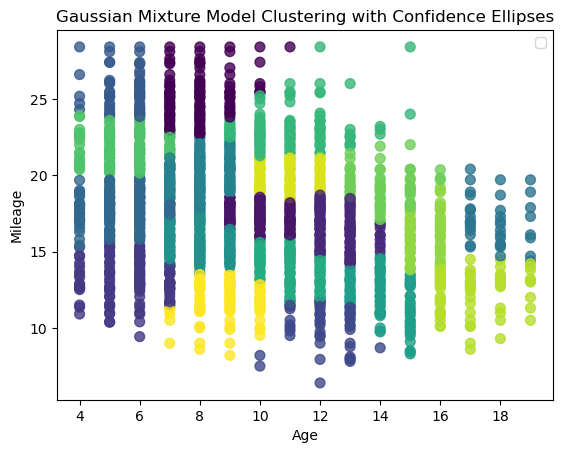

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

scaler = StandardScaler()
X = scaler.fit_transform(df)


# Choose the number of clusters (you may need to tune this)
num_clusters = 19

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Print intervals for each cluster
for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    cluster_data = df.iloc[cluster_indices]

    feature1_interval = (cluster_data['Age'].min(), cluster_data['Age'].max())
    feature2_interval = (cluster_data['Mileage'].min(), cluster_data['Mileage'].max())

    print(f"Cluster {i} Intervals:")
    print(f"Age: Min = {feature1_interval[0]}, Max = {feature1_interval[1]}")
    print(f"Mileage: Min = {feature2_interval[0]}, Max = {feature2_interval[1]}")
    print("---------------------")

# Plot the clusters with confidence ellipses
plt.scatter(df['Age'], df['Mileage'], c=labels, cmap='viridis', s=50, alpha=0.8)



plt.title('Gaussian Mixture Model Clustering with Confidence Ellipses')
plt.xlabel('Age')
plt.ylabel('Mileage')
plt.legend()
plt.show()


In [418]:
df

Age  Mileage  Cluster
0       8    19.67        8
1      12    18.20        2
2      11    20.77       17
3      10    15.20       11
4      10    23.08       12
...   ...      ...      ...
2176   10    18.25        1
2177   15    13.93       15
2178    9    16.30        9
2179   13    17.24        2
2180   12    16.09        2

[1852 rows x 3 columns]

train RF model and evaluate it

In [419]:
df.to_csv('Downloads/car/car_dataset_with_clusters.csv' , index=False)

Train the robust classifier ml model Random Forset on the newest dataset df which contains Age , Mileage and Cluster output and Evaluate it 

In [420]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Split the data into features and target
X = df[['Age', 'Mileage']]
y = df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the target labels on the test set
y_pred = classifier.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Get feature importances
feature_importances = classifier.feature_importances_

# Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")



Confusion Matrix:
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 32  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0

Test the model classifier

In [421]:
y_pred = classifier.predict(X_test)
print(y_pred)

[ 8 16  8  7  9 11  8  6 13  8 11  6  8 18 12 13 11  4  8 18 17  7  9 16
 10  3 17 12 10  9 10  8 13  8 18 11 17  6  8  9  9 13 17  1  2 16  3  3
 18  1  9 10 13 10 16 13  7 16  9  9 15  3  6 12  6  6  3 10  6  8 14 11
  1  6 11  7 11  9 13  8 11  3  1  7  6 18  9  8 10  2  8 17 18 12  8  9
  8  2 13  2  1  8 18  0 12 12  7  1  5 13  9 10  0  0  1  4  1 13 13  8
  6  4 10 12 11  0 15  3 13  6 13  9  9 17  7  6  0 15  0 18 17  3 13  6
  4 14 10  2  5  0  9 17  6  6 10 10 10  1  6  3  6  2 10  9  6  3  2  2
 13 11 17 17  2  1  4  1  4  6  9  5  6 11 10 14  3 12  6  2  8  0  7 11
  7  3  2  9  6  8 14  5  0 10 18 16  8  2 14  2 11 11 12 16  5  6  1  6
  7  1  1 14  1  8 13  9  6  6  1 15  1 10 18 17 17 10  8 12  3  9  9  9
  2  5 12  3  3 12  9  2  2 12  7  3  2 11 12  1 18 16  2  3  0 12 18  8
  6 18 12  1  3 18  6  8  2  9  0 11  7  5  1  8 12  6  6 15 15  6 10 18
  9  6  5 12  4 11  0  0 13  1  2 10  8  2  0 12 18  2  9  5 13  1 13  9
  8 12 15  6  9 17  6  6  1  6  9 18 18  0 13 13  7

Export the model in an external file with joblib extension to use it for deployment

In [422]:
import joblib

joblib.dump(classifier, 'Downloads/car/car_random_forest_model.joblib')

['Downloads/car/car_random_forest_model.joblib']